In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
mlb = pd.read_csv('/Users/nikolay/Desktop/MLB dataset/baseballdata.csv')

In [16]:
mlb.columns = ['Unnamed: 0', 'Rk', 'Year', 'Team', 'League', 'GamePlayed', 'Wins', 'Losses', 'Ties', 'WinLoss%',
       'pythWinLoss', 'Finish', 'GamesBehind', 'Playoffs', 'RunsScored', 'OppontRunScored', 'Attendance',
       'BatAge', 'PAge', 'PlayersInGame', 'PitchersInGame', 'Top.Player', 'Managers', 'current']

In [17]:
mlb.head()

,Unnamed: 0,Rk,Year,Team,League,GamePlayed,Wins,Losses,Ties,WinLoss%,...,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,Top.Player,Managers,current
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,752,890,"2,036,216",26.7,26.4,50,29,J.Segura (5.7),C.Hale (69-93),Arizona Diamondbacks
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,720,713,"2,080,145",26.6,27.1,50,27,P.Goldschmidt (8.8),C.Hale (79-83),Arizona Diamondbacks
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,615,742,"2,073,730",27.6,28.0,52,25,P.Goldschmidt (4.5),K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,685,695,"2,134,895",28.1,27.6,44,23,P.Goldschmidt (7.1),K.Gibson (81-81),Arizona Diamondbacks
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,734,688,"2,177,617",28.3,27.4,48,23,A.Hill (5.0),K.Gibson (81-81),Arizona Diamondbacks


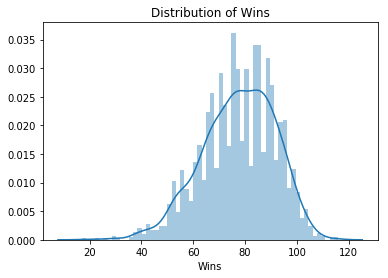

In [18]:
distrWins = sns.distplot(mlb["Wins"], bins = 60)
plt.title('Distribution of Wins')
plt.show()

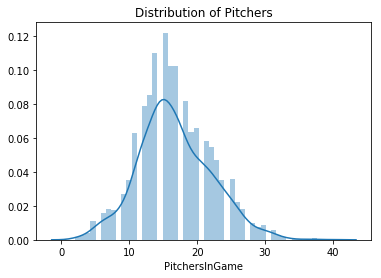

In [19]:
distrPitchers = sns.distplot(mlb["PitchersInGame"], bins = 50)
plt.title('Distribution of Pitchers')
plt.show()

In [20]:
print(mlb['Wins'].mean()) #Avg mean per year in line with the hist

77.51387818041634


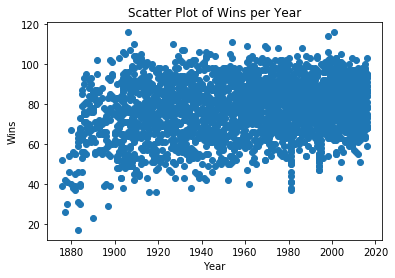

In [21]:
plt.scatter(mlb['Year'], mlb['Wins'])   #Year vs. Wins
plt.title('Scatter Plot of Wins per Year')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()   #we can see that fewer games were played in 1880-1900

In [22]:
splitPlayer = mlb['Top.Player']
listOfValues = []

In [23]:
for name in splitPlayer:
    start = name.find("(") +1
    end = name.find(")")
    value = name[start:end]
    listOfValues.append(float(value))

In [24]:
mlb['WAR'] = listOfValues #Wins Above Replacement(players total contributions to their team)

In [25]:
mlb.head()

,Unnamed: 0,Rk,Year,Team,League,GamePlayed,Wins,Losses,Ties,WinLoss%,...,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,Top.Player,Managers,current,WAR
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,890,"2,036,216",26.7,26.4,50,29,J.Segura (5.7),C.Hale (69-93),Arizona Diamondbacks,5.7
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,713,"2,080,145",26.6,27.1,50,27,P.Goldschmidt (8.8),C.Hale (79-83),Arizona Diamondbacks,8.8
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,742,"2,073,730",27.6,28.0,52,25,P.Goldschmidt (4.5),K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks,4.5
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,695,"2,134,895",28.1,27.6,44,23,P.Goldschmidt (7.1),K.Gibson (81-81),Arizona Diamondbacks,7.1
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,688,"2,177,617",28.3,27.4,48,23,A.Hill (5.0),K.Gibson (81-81),Arizona Diamondbacks,5.0


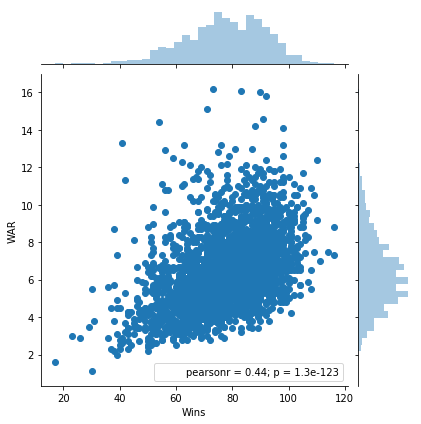

In [26]:
sns.jointplot(x='Wins', y='WAR', data=mlb)
plt.show()

In [27]:
listOfAttendanceString = mlb['Attendance']

In [28]:
listOfAttendanceFloat = []
for attendance in listOfAttendanceString:
    attendanceString = str(attendance)
    attendenceFloat = float(attendanceString.replace(',', ''))
    listOfAttendanceFloat.append(attendenceFloat)
    
    
print(listOfAttendanceFloat)
    

[2036216.0, 2080145.0, 2073730.0, 2134895.0, 2177617.0, 2105432.0, 2056697.0, 2128765.0, 2509924.0, 2325249.0, 2091685.0, 2059424.0, 2519560.0, 2805542.0, 3198977.0, 2736451.0, 2942251.0, 3019654.0, 3610290.0, 2020914.0, 2001392.0, 2354305.0, 2548679.0, 2420171.0, 2372940.0, 2510119.0, 2373631.0, 2532834.0, 2745207.0, 2550524.0, 2521167.0, 2327565.0, 2401084.0, 2603484.0, 2823530.0, 3234304.0, 3284897.0, 3360860.0, 3464488.0, 2901242.0, 2561831.0, 2539240.0, 3884720.0, 3077400.0, 2140217.0, 980129.0, 984930.0, 848089.0, 1217402.0, 1387181.0, 1350137.0, 1724892.0, 2119935.0, 1801985.0, 535418.0, 1048411.0, 769465.0, 904494.0, 872464.0, 818179.0, 534672.0, 981085.0, 800655.0, 752973.0, 1006320.0, 1078848.0, 1458320.0, 1126540.0, 1389222.0, 1539801.0, 555584.0, 910911.0, 773018.0, 766921.0, 1101441.0, 1497799.0, 1749112.0, 1971101.0, 2215404.0, 2046331.0, 2005836.0, 2131388.0, 1826397.0, 281278.0, 487475.0, 944391.0, 1081795.0, 1455439.0, 1277361.0, 969673.0, 374178.0, 208691.0, 271289.0,

In [29]:
mlb.head()

,Unnamed: 0,Rk,Year,Team,League,GamePlayed,Wins,Losses,Ties,WinLoss%,...,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,Top.Player,Managers,current,WAR
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,890,"2,036,216",26.7,26.4,50,29,J.Segura (5.7),C.Hale (69-93),Arizona Diamondbacks,5.7
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,713,"2,080,145",26.6,27.1,50,27,P.Goldschmidt (8.8),C.Hale (79-83),Arizona Diamondbacks,8.8
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,742,"2,073,730",27.6,28.0,52,25,P.Goldschmidt (4.5),K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks,4.5
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,695,"2,134,895",28.1,27.6,44,23,P.Goldschmidt (7.1),K.Gibson (81-81),Arizona Diamondbacks,7.1
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,688,"2,177,617",28.3,27.4,48,23,A.Hill (5.0),K.Gibson (81-81),Arizona Diamondbacks,5.0


In [30]:
mlb['Attendance'] = listOfAttendanceFloat

In [31]:
mlb['Wins'].corr(mlb['Attendance'])

0.3918495921380999

In [32]:
UniqueTeam = []
for team in mlb.Team:
    if team not in UniqueTeam:
        UniqueTeam.append(team)
print(UniqueTeam)

['Arizona Diamondbacks', 'Atlanta Braves', 'Milwaukee Braves', 'Boston Braves', 'Boston Bees', 'Boston Rustlers', 'Boston Doves', 'Boston Beaneaters', 'Boston Red Stockings', 'Baltimore Orioles', 'St. Louis Browns', 'Milwaukee Brewers', 'Boston Red Sox', 'Boston Americans', 'Chicago Cubs', 'Chicago Orphans', 'Chicago Colts', 'Chicago White Stockings', 'Chicago White Sox', 'Cincinnati Reds', 'Cincinnati Redlegs', 'Cincinnati Red Stockings', 'Cleveland Indians', 'Cleveland Naps', 'Cleveland Bronchos', 'Cleveland Blues', 'Colorado Rockies', 'Detroit Tigers', 'Houston Astros', "Houston Colt .45's", 'Kansas City Royals', 'Los Angeles Angels of Anaheim', 'Anaheim Angels', 'California Angels', 'Los Angeles Angels', 'Los Angeles Dodgers', 'Brooklyn Dodgers', 'Brooklyn Robins', 'Brooklyn Superbas', 'Brooklyn Bridegrooms', 'Brooklyn Grooms', 'Brooklyn Grays', 'Brooklyn Atlantics', 'Miami Marlins', 'Florida Marlins', 'Seattle Pilots', 'Minnesota Twins', 'Washington Senators', 'New York Mets', 'Ne

In [33]:
len(UniqueTeam)  #72 different teams

72

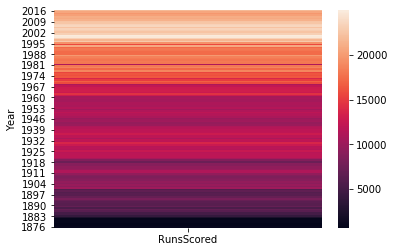

In [34]:
mlbGroupedbyYear = mlb.groupby(['Year']).sum()
RunsPerYear = mlbGroupedbyYear[['RunsScored']]
sns.heatmap(RunsPerYear.iloc[::-1])    #The number of Runs increase as the years pass

In [37]:
GamesLastTenYears = mlb.groupby(['Year'], as_index=False).sum().sort_values(by='Year', ascending=False)
GamesLastTenYears

,Year,Unnamed: 0,Rk,GamePlayed,Wins,Losses,Ties,WinLoss%,pythWinLoss,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,WAR
140,2016,40445,30,4856,2427,2427,2,15.001,15.032,21744,21744,73159044.0,853.4,849.2,1348,824,182.6
139,2015,40475,60,4858,2429,2429,0,15.001,15.026,20647,20647,73719340.0,851.0,851.8,1485,809,186.3
138,2014,40505,90,4860,2430,2430,0,15.001,15.019,19761,19761,73739622.0,854.4,855.7,1433,745,182.9
137,2013,40535,120,4862,2431,2431,0,15.001,14.997,20255,20255,74027037.0,855.7,852.4,1409,726,192.9
136,2012,40565,150,4860,2430,2430,0,15.000,15.043,21017,21017,74859268.0,855.8,851.0,1407,722,177.3
135,2011,40595,180,4858,2429,2429,0,15.002,14.982,20808,20808,73425667.0,861.9,849.6,1389,707,176.4
134,2010,40625,210,4860,2430,2430,0,15.002,14.997,21308,21308,73061763.0,865.9,850.5,1356,684,183.7
133,2009,40655,240,4860,2430,2430,0,15.000,14.991,22419,22419,73430580.0,865.9,851.4,1388,729,191.5
132,2008,40685,270,4856,2428,2428,0,14.999,15.016,22585,22585,78624315.0,865.5,858.3,1384,700,182.1
131,2007,40715,300,4862,2431,2431,0,14.998,15.001,23322,23322,79484718.0,873.2,861.7,1384,717,182.3


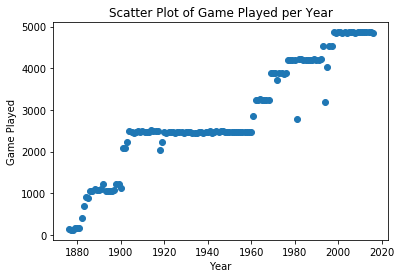

In [38]:
plt.scatter(GamesLastTenYears['Year'], GamesLastTenYears['GamePlayed'])   #Year vs. Wins
plt.title('Scatter Plot of Game Played per Year')
plt.xlabel('Year')
plt.ylabel('Game Played')

plt.show()

In [39]:
max(mlb['GamePlayed'])

165

In [40]:
min(mlb['GamePlayed'])

60

In [41]:
Year2015 = mlb.Year == 2015
mlb[Year2015]                    # 2016

,Unnamed: 0,Rk,Year,Team,League,GamePlayed,Wins,Losses,Ties,WinLoss%,...,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,Top.Player,Managers,current,WAR
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,713,2080145.0,26.6,27.1,50,27,P.Goldschmidt (8.8),C.Hale (79-83),Arizona Diamondbacks,8.8
20,21,2,2015,Atlanta Braves,NL East,162,67,95,0,0.414,...,760,2001392.0,28.8,26.6,60,37,A.Simmons (4.0),F.Gonzalez (67-95),Atlanta Braves,4.0
161,162,2,2015,Baltimore Orioles,AL East,162,81,81,0,0.500,...,693,2281202.0,27.9,28.3,48,22,M.Machado (7.1),B.Showalter (81-81),Baltimore Orioles,7.1
277,278,2,2015,Boston Red Sox,AL East,162,78,84,0,0.481,...,753,2880694.0,28.4,28.6,51,26,M.Betts (6.0),J.Farrell (78-84),Boston Red Sox,6.0
393,394,2,2015,Chicago Cubs,NL Central,162,97,65,0,0.599,...,608,2919122.0,26.9,29.3,50,29,J.Arrieta (9.0),J.Maddon (97-65),Chicago Cubs,9.0
534,535,2,2015,Chicago White Sox,AL Central,162,76,86,0,0.469,...,701,1755810.0,28.2,27.8,40,24,A.Eaton (3.9),R.Ventura (76-86),Chicago White Sox,3.9
650,651,2,2015,Cincinnati Reds,NL Central,162,64,98,0,0.395,...,754,2419506.0,29.5,27.3,50,28,J.Votto (7.6),B.Price (64-98),Cincinnati Reds,7.6
785,786,2,2015,Cleveland Indians,AL Central,161,81,80,0,0.503,...,640,1388905.0,28.0,27.3,49,27,F.Lindor (4.6),T.Francona (81-80),Cleveland Indians,4.6
901,902,2,2015,Colorado Rockies,NL West,162,68,94,0,0.420,...,844,2506789.0,28.0,28.7,51,30,N.Arenado (5.8),W.Weiss (68-94),Colorado Rockies,5.8
925,926,2,2015,Detroit Tigers,AL Central,161,74,87,0,0.460,...,803,2726048.0,28.3,28.7,47,27,I.Kinsler (6.0),B.Ausmus (74-87),Detroit Tigers,6.0


In [42]:
GroupBySumYear = mlb.groupby(['Year'], as_index=False).sum().sort_values(by='Year', ascending=False)
GroupBySumYear

,Year,Unnamed: 0,Rk,GamePlayed,Wins,Losses,Ties,WinLoss%,pythWinLoss,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,WAR
140,2016,40445,30,4856,2427,2427,2,15.001,15.032,21744,21744,73159044.0,853.4,849.2,1348,824,182.6
139,2015,40475,60,4858,2429,2429,0,15.001,15.026,20647,20647,73719340.0,851.0,851.8,1485,809,186.3
138,2014,40505,90,4860,2430,2430,0,15.001,15.019,19761,19761,73739622.0,854.4,855.7,1433,745,182.9
137,2013,40535,120,4862,2431,2431,0,15.001,14.997,20255,20255,74027037.0,855.7,852.4,1409,726,192.9
136,2012,40565,150,4860,2430,2430,0,15.000,15.043,21017,21017,74859268.0,855.8,851.0,1407,722,177.3
135,2011,40595,180,4858,2429,2429,0,15.002,14.982,20808,20808,73425667.0,861.9,849.6,1389,707,176.4
134,2010,40625,210,4860,2430,2430,0,15.002,14.997,21308,21308,73061763.0,865.9,850.5,1356,684,183.7
133,2009,40655,240,4860,2430,2430,0,15.000,14.991,22419,22419,73430580.0,865.9,851.4,1388,729,191.5
132,2008,40685,270,4856,2428,2428,0,14.999,15.016,22585,22585,78624315.0,865.5,858.3,1384,700,182.1
131,2007,40715,300,4862,2431,2431,0,14.998,15.001,23322,23322,79484718.0,873.2,861.7,1384,717,182.3


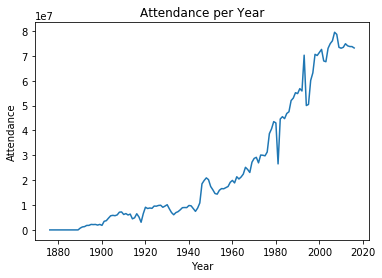

In [43]:
#the number of attendance is increased, but it decreased for the past recent years
plt.plot(GroupBySumYear['Year'], GroupBySumYear['Attendance'])  
plt.title('Attendance per Year')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.show()

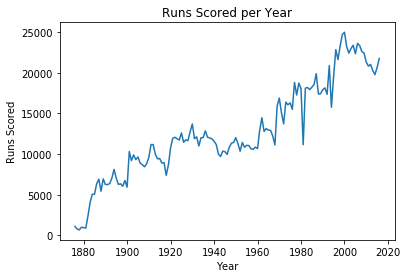

In [44]:
plt.plot(GroupBySumYear['Year'], GroupBySumYear['RunsScored'])  
plt.title('Runs Scored per Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.show()

In [45]:
GroupByCountYear = mlb.groupby(['Year'], as_index=False).count().sort_values(by='Year', ascending=False)
GroupByCountYear

,Year,Unnamed: 0,Rk,Team,League,GamePlayed,Wins,Losses,Ties,WinLoss%,...,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,Top.Player,Managers,current,WAR
140,2016,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
139,2015,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
138,2014,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
137,2013,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
136,2012,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
135,2011,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
134,2010,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
133,2009,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
132,2008,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
131,2007,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


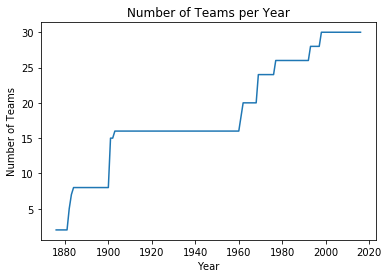

In [46]:
#The number of teams is increased over the year, therefore 30 cities has MLB team.
#From the business prospective, more people attend the game more sales made
plt.plot(GroupByCountYear['Year'], GroupByCountYear['Team'])  
plt.title('Number of Teams per Year')
plt.xlabel('Year')
plt.ylabel('Number of Teams')
plt.show()

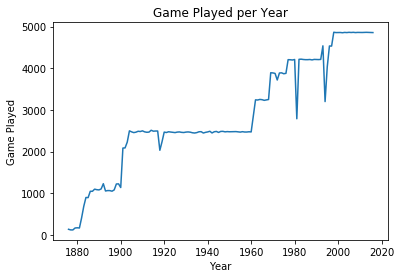

In [47]:
plt.plot(GroupBySumYear['Year'], GroupBySumYear['GamePlayed'])  
plt.title('Game Played per Year')
plt.xlabel('Year')
plt.ylabel('Game Played')
plt.show()

In [48]:
GroupBySumYear[100:150]

,Year,Unnamed: 0,Rk,GamePlayed,Wins,Losses,Ties,WinLoss%,pythWinLoss,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,WAR
40,1916,19382,1616,2494,1227,1227,40,7.999,8.045,8889,8889,6503519.0,436.6,424.9,564,197,114.7
39,1915,19398,1632,2490,1222,1222,46,8.000,8.050,9445,9445,4864826.0,431.6,414.0,555,224,108.7
38,1914,19414,1648,2512,1228,1228,56,8.002,7.985,9408,9408,4454988.0,428.6,411.0,566,196,111.1
37,1913,19430,1664,2468,1213,1213,42,7.994,7.994,9965,9965,6358336.0,429.4,421.0,615,238,113.2
36,1912,19446,1680,2464,1219,1219,26,8.008,8.032,11154,11154,5999390.0,428.8,423.0,630,252,130.7
35,1911,19462,1696,2474,1218,1218,38,7.997,8.038,11164,11164,6571282.0,434.6,428.2,567,227,109.8
34,1910,19478,1712,2498,1223,1223,52,8.002,7.995,9584,9584,6206447.0,436.9,433.3,537,211,123.8
33,1909,19494,1728,2482,1218,1218,46,7.999,8.005,8810,8810,7236290.0,441.8,433.3,543,216,106.2
32,1908,19510,1744,2488,1228,1228,32,7.999,7.992,8422,8422,7123474.0,456.8,446.5,470,183,119.0
31,1907,19526,1760,2466,1203,1203,60,8.001,8.013,8703,8703,6038984.0,458.3,449.5,447,173,102.4


In [49]:
#Average Number of Games per year from 1876 to 2016
AverageNumberOfGames = sum(mlb.GamePlayed)/len(mlb.Year.unique())
AverageNumberOfGames

2855.0354609929077

In [50]:
GamesLessThenAvg = (GroupBySumYear.Year > 1970) & (GroupBySumYear.GamePlayed < AverageNumberOfGames)

In [51]:
#Data shows that number of game was dropped significantly in 1981, I reseached it was due to 
#Major League Baseball strike called by players
GroupBySumYear[GamesLessThenAvg]

,Year,Unnamed: 0,Rk,GamePlayed,Wins,Losses,Ties,WinLoss%,pythWinLoss,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,WAR
105,1981,36688,936,2788,1389,1389,10,12.992,13.004,11147,11147,26544376.0,742.6,735.9,944,374,117.5


In [52]:
GroupBySumLeague = mlb.groupby(['League'], as_index=False).sum().sort_values(by='League', ascending=False)
GroupBySumLeague

,League,Unnamed: 0,Rk,Year,GamePlayed,Wins,Losses,Ties,WinLoss%,pythWinLoss,RunsScored,OppontRunScored,Attendance,BatAge,PAge,PlayersInGame,PitchersInGame,WAR
8,NL West,329978,6718,521736,41813,20873,20924,16,130.832,130.732,179610,180304,562497660.0,7456.4,7425.9,10880,5001,1628.5
7,NL East,436692,6804,529718,42367,21223,21114,30,133.343,133.411,180777,180214,513507355.0,7502.1,7488.4,11148,5236,1662.4
6,NL Central,168432,1560,260650,20728,10182,10536,10,63.913,64.113,93634,95217,317499009.0,3751.8,3701.5,5779,2945,768.4
5,NL,937725,62078,1327635,102977,51462,50470,1045,348.861,348.677,466978,461547,410092278.0,19294.5,19129.9,22206,8930,4615.1
4,AL West,427512,7058,523413,41894,20805,21068,21,130.573,130.702,186728,187783,475951101.0,7446.3,7397.7,10947,5018,1620.8
3,AL East,333859,7324,561470,44871,22930,21924,17,144.174,144.161,206907,201765,567615364.0,8140.1,8063.9,11617,5395,1812.4
2,AL Central,112128,1380,230575,18289,8919,9366,4,56.165,56.145,86361,88734,231431437.0,3273.6,3219.7,5054,2582,665.5
1,AL,570543,45489,1079997,86108,42701,42666,741,279.126,279.205,379287,379161,385460536.0,15739.6,15571.3,19270,8005,3724.4
0,AA,48846,3805,54688,3513,1976,1478,59,16.441,16.460,21200,18078,0.0,768.8,716.2,590,199,210.8


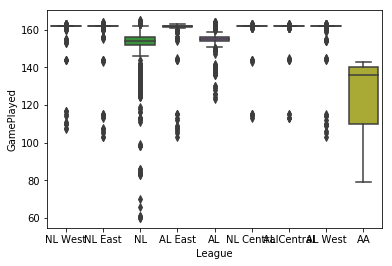

In [53]:
#Median is lower in AA League then other ones
#NL League has the most outliers
sns.boxplot(data=mlb, x='League', y='GamePlayed')